<a href="https://colab.research.google.com/github/zietho/machine-learning/blob/master/Machine_Learning_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import os as os
import matplotlib.pyplot as plt

import regex as re
import nltk

dataset_filename = os.listdir("./")
dataset_filename

['.DS_Store',
 '.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'datasets',
 'Machine_Learning_00.ipynb',
 'Machine_Learning_00.Rmd',
 'README.md']

# Data Set 1: sentiment140

Abstract: This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment. <sup>1</sup>

<sup>1</sup> https://www.kaggle.com/kazanova/sentiment140

## Load raw sentiment140.csv

In [3]:
dataset_path = 'datasets/sentiment/part-1-training.1600000.processed.noemoticon.csv.csv'
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]

df_raw = pd.read_csv(dataset_path, encoding ='latin_1' , names=DATASET_COLUMNS)
df_raw.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Preprocess: extract day from date to sep col

In [ ]:
def export_to_csv(df, file_name):
    print('write file to: ', file_name)
    df.to_csv(file_name, encoding='utf-8', index=False)

def clean_date(df):
    '''
    weekday extraction 1min
    '''
    def funcapply(x):
        return x[0:3]
    df['weekday'] = df['date'].apply(lambda x: funcapply(x))

    '''
    parse time to pandas datetime takes 5 minutes
    from datetime import datetime
    d = datetime.strptime('Thu Apr 23 13:38:19 +0000 2009','%a %b %d %H:%M:%S %z %Y').strftime('%Y-%m-%d %H:%M:%S');
    '''
    df['date'] = pd.to_datetime(df['date'])
    return df

def preprocess_tweet(tweet):
    #convert the tweet to lower case
    tweet = tweet.lower()
    #convert all urls to string "URL"
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #convert all @username to "AT_USER"
    #tweet = re.sub('@[^\s]+','AT_USER', tweet)
    #correct all multiple white spaces to a single white space
    tweet = re.sub('[\s]+', ' ', tweet)
    #convert "#topic" to just "topic"
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    return tweet

def preprocess(df):
    '''
    call all other functions
    create new columns
    '''
    print("clean date...")    
    # split and clean date
    df_new = clean_date(df)
    print("clean text...")
    # clean tweet text
    df_new['text'] = df_new['text'].apply(preprocess_tweet)
    print("add wc...")
    # add col text wordcount
    df_new['text_wc'] = [len(nltk.word_tokenize(t)) for t in df_new.text]
    print("add len...")
    # add col text string length
    df_new['text_len'] = [len(t) for t in df_new.text]
    return df_new
    
#df_clean = preprocess(df_raw)
dataset_path = 'datasets/sentiment/sentiment140_date_clean.csv'
export_to_csv(df_clean, './data/sentiment140_date_clean.csv')

## Read Clean sentiment140

In [5]:
dataset_path = 'datasets/sentiment/sentiment140_date_clean.csv'
df_clean = pd.read_csv(dataset_path, encoding='utf-8', header=0)
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean.head()

,target,ids,date,flag,user,text,weekday,text_wc,text_len
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot URL - awww, that's a bummer. you s...",Mon,25,93
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...,Mon,25,110
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...,Mon,21,88
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Mon,10,47
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",Mon,30,111


## Column Data Types 

In [6]:
df_clean.dtypes

target               int64
ids                  int64
date        datetime64[ns]
flag                object
user                object
text                object
weekday             object
text_wc              int64
text_len             int64
dtype: object

## Shape and Size

In [7]:
print("Dataset has ", df_clean.shape[0], "rows and ", df_clean.shape[1], "columns.")

Dataset has  1600000 rows and  9 columns.


## Sentiment Distribution

In [8]:
target_cnt = df_clean.target.value_counts()
target_cnt = target_cnt.to_frame()
target_cnt.reset_index(inplace=True)
target_cnt.columns = ['SENTIMENT', 'COUNT']
target_cnt.SENTIMENT = target_cnt.SENTIMENT.map({4:'pos', 2:'neu', 0:'neg'})

plt.figure(figsize=(10,5))
plt.bar(target_cnt.SENTIMENT, target_cnt.COUNT)
plt.title("Sentiment label distribuition")

target_cnt

AttributeError: module 'matplotlib' has no attribute 'figure'

## Distribution by days

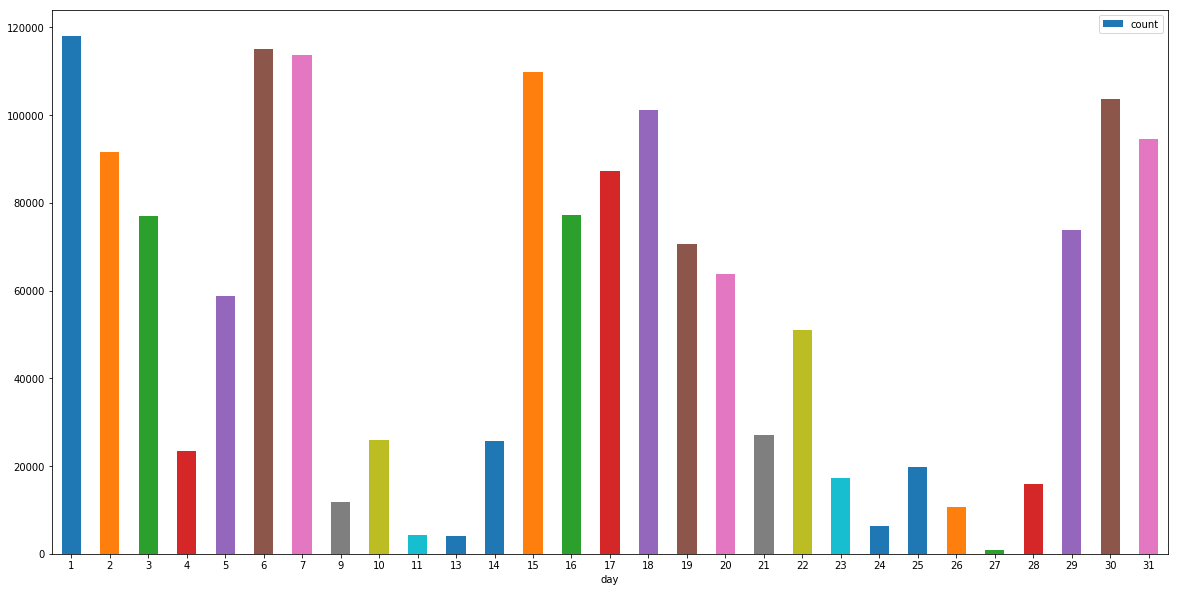

In [265]:
g = df_clean.groupby(by=df_clean.date.dt.day).agg('count')

df_time_plot = pd.DataFrame({"day":g.index, "count":g.ids})

plt.rcParams["figure.figsize"] = (20,10)
ax = df_time_plot.plot.bar(x='day', y='count', rot=0)

## Distribution by Weekdays

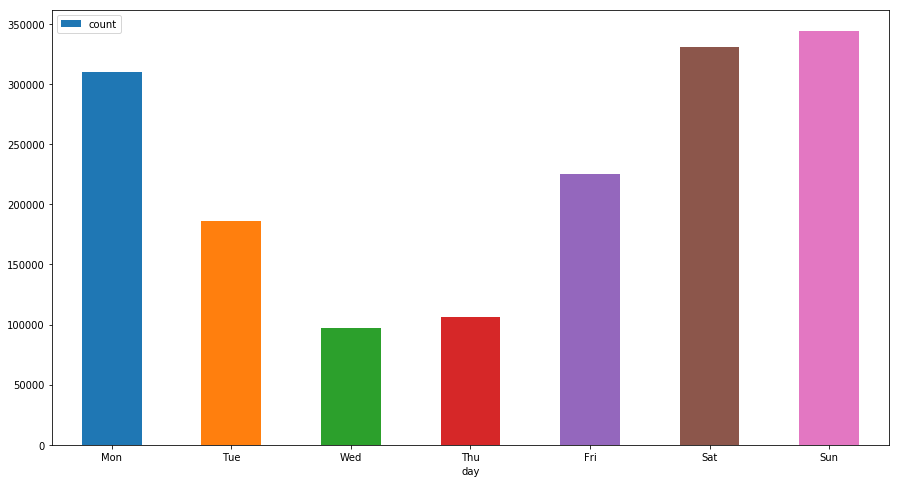

In [280]:
g = df_clean.groupby(by=df_clean.weekday).agg('count')

df_weekday_plot = pd.DataFrame({"day":g.index, "count":g.ids})
# sort categorical
cats = ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun']
df_weekday_plot.day = pd.Categorical(df_weekday_plot.day, 
                      categories=cats,
                      ordered=True)
df_weekday_plot.sort_values('day', inplace=True)
df_weekday_plot


plt.rcParams["figure.figsize"] = (15,8)
ax = df_weekday_plot.plot.bar(x='day', y='count', rot=0)

## distribution of text string length

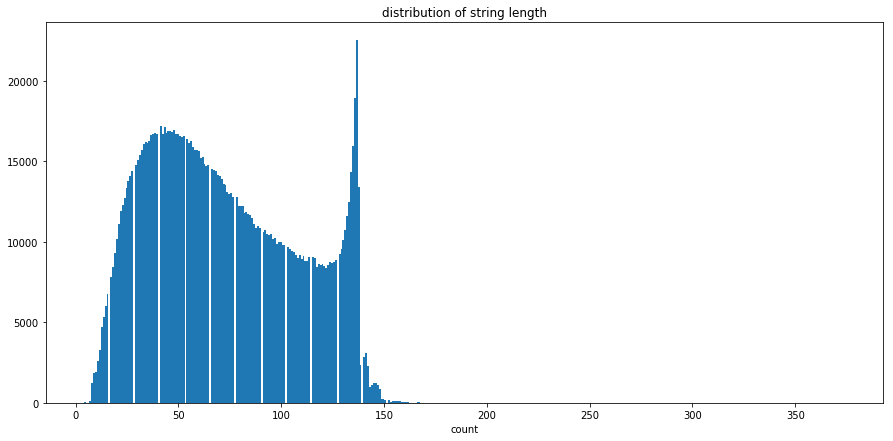

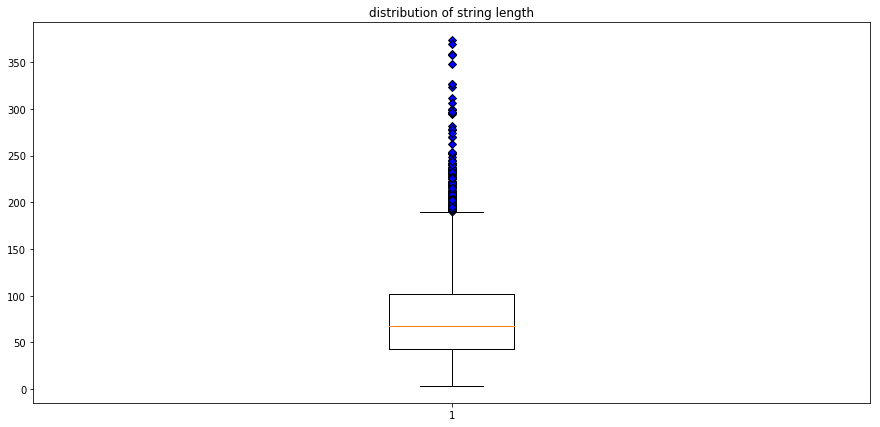

In [285]:
plt.figure(figsize=(15,7))
plt.hist(df_clean.text_len, bins=400)
plt.title("distribution of string length")
plt.xlabel("length")
plt.xlabel("count")
plt.show()

plt.figure(figsize=(15,7))
green_diamond = dict(markerfacecolor='b', marker='D')
plt.boxplot(df_clean.text_len, flierprops=green_diamond) # plot pre_clean_len column
plt.title("distribution of string length")
plt.show()

## distribution of text wordcount

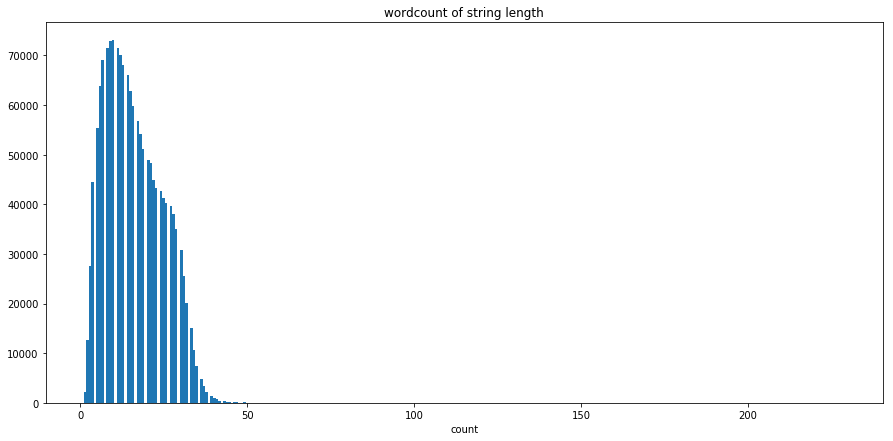

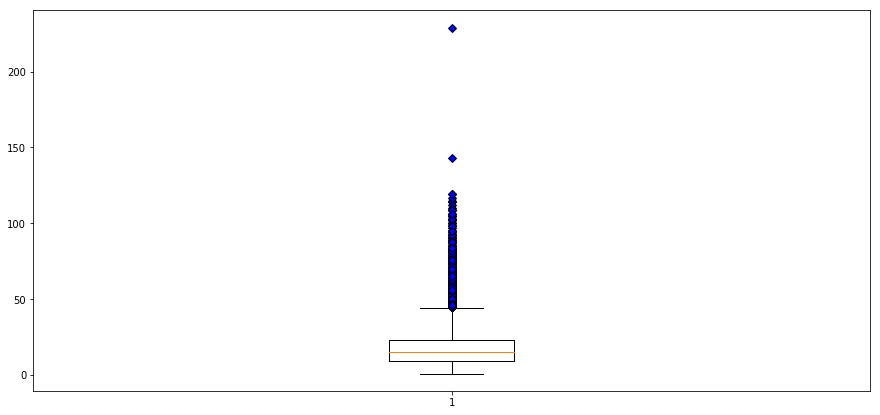

In [287]:
plt.figure(figsize=(15,7))
plt.hist(df_clean.text_wc, bins=300)
plt.xlabel("length")
plt.xlabel("count")
plt.title("wordcount of string length")
plt.show()

plt.figure(figsize=(15,7))
green_diamond = dict(markerfacecolor='b', marker='D')
plt.boxplot(df_clean.text_wc, flierprops=green_diamond) # plot pre_clean_len column
plt.show()

# Data Set 1: OPPORTUNITY Activity Recognition Dataset

Abstract: "The OPPORTUNITY Dataset for Human Activity Recognition from Wearable, Object, and Ambient Sensors is a dataset devised to benchmark human activity recognition algorithms (classification, automatic data segmentation, sensor fusion, feature extraction, etc). <sup>1</sup>

<sup>1</sup> https://archive.ics.uci.edu/ml/datasets/OPPORTUNITY+Activity+Recognition#

# activity of daily living (ADL)
Read in activity of daily living (ADL) for all users

In [97]:
# read in column names
opportunity_cols = dict()
opportunity_cols_txt = open("datasets/opportunity/column_names.txt", "r")

for line in opportunity_cols_txt:

    if re.search('Column',line) != None:
        col_id = re.search('Column: (\S*) ',line).group(1)
        opportunity_cols[col_id] = dict()
        opportunity_cols[col_id]['name'] = re.search('Column: \S* (\S*)',line).group(1)

        if re.search('Column: \S* \S* \S*',line) != None:
            opportunity_cols[col_id]['sensor'] = re.search('Column: \S* \S* (\S*)',line).group(1)
            opportunity_cols[col_id]['sensor_axis'] = re.search(' (\S*);',line).group(1)
            opportunity_cols[col_id]['value_type'] = re.search('value = (.*),',line).group(1)
            opportunity_cols[col_id]['unit'] = re.search('unit =(.*)$',line).group(1)
            
opportunity_cols

{'1': {'name': 'MILLISEC'},
 '2': {'name': 'Accelerometer',
  'sensor': 'RKN^',
  'sensor_axis': 'accX',
  'value_type': 'round(original_value)',
  'unit': ' milli g'},
 '3': {'name': 'Accelerometer',
  'sensor': 'RKN^',
  'sensor_axis': 'accY',
  'value_type': 'round(original_value)',
  'unit': ' milli g'},
 '4': {'name': 'Accelerometer',
  'sensor': 'RKN^',
  'sensor_axis': 'accZ',
  'value_type': 'round(original_value)',
  'unit': ' milli g'},
 '5': {'name': 'Accelerometer',
  'sensor': 'HIP',
  'sensor_axis': 'accX',
  'value_type': 'round(original_value)',
  'unit': ' milli g'},
 '6': {'name': 'Accelerometer',
  'sensor': 'HIP',
  'sensor_axis': 'accY',
  'value_type': 'round(original_value)',
  'unit': ' milli g'},
 '7': {'name': 'Accelerometer',
  'sensor': 'HIP',
  'sensor_axis': 'accZ',
  'value_type': 'round(original_value)',
  'unit': ' milli g'},
 '8': {'name': 'Accelerometer',
  'sensor': 'LUA^',
  'sensor_axis': 'accX',
  'value_type': 'round(original_value)',
  'unit': '

In [124]:
col_names = list()
for key, column in opportunity_cols.items():
    col_names.append(key+"_"+column.get('name'))
col_names.insert(0,'0_User')
col_names

['0_User',
 '1_MILLISEC',
 '2_Accelerometer',
 '3_Accelerometer',
 '4_Accelerometer',
 '5_Accelerometer',
 '6_Accelerometer',
 '7_Accelerometer',
 '8_Accelerometer',
 '9_Accelerometer',
 '10_Accelerometer',
 '11_Accelerometer',
 '12_Accelerometer',
 '13_Accelerometer',
 '14_Accelerometer',
 '15_Accelerometer',
 '16_Accelerometer',
 '17_Accelerometer',
 '18_Accelerometer',
 '19_Accelerometer',
 '20_Accelerometer',
 '21_Accelerometer',
 '22_Accelerometer',
 '23_Accelerometer',
 '24_Accelerometer',
 '25_Accelerometer',
 '26_Accelerometer',
 '27_Accelerometer',
 '28_Accelerometer',
 '29_Accelerometer',
 '30_Accelerometer',
 '31_Accelerometer',
 '32_Accelerometer',
 '33_Accelerometer',
 '34_Accelerometer',
 '35_Accelerometer',
 '36_Accelerometer',
 '37_Accelerometer',
 '38_InertialMeasurementUnit',
 '39_InertialMeasurementUnit',
 '40_InertialMeasurementUnit',
 '41_InertialMeasurementUnit',
 '42_InertialMeasurementUnit',
 '43_InertialMeasurementUnit',
 '44_InertialMeasurementUnit',
 '45_Iner

In [110]:
adl_filename_mask = 'S{}-ADL{}.dat'
drill_filename_mask = 'S{}-Drill.dat'
df_opportunity_adl = pd.DataFrame()
df_opportunity_drill = pd.DataFrame()

for user_idx in range(1,5):
    for run in range (1,6):
        path = 'datasets/opportunity/'+adl_filename_mask.format(user_idx, run)
        df_partial_adl = pd.read_csv(path, header=None, sep='\s')
        df_partial_adl.insert(0,'User',user_idx)
        df_opportunity_adl = df_opportunity_adl.append(df_partial_adl) 
    
    path = 'datasets/opportunity/'+adl_filename_mask.format(user_idx, run)
    df_partial_drill = pd.read_csv(path, header=None, sep='\s')
    df_partial_drill.insert(0,'User',user_idx)
    df_opportunity_drill = df_opportunity_drill.append(df_partial_adl)

print(df_opportunity_adl.shape)

#df_adl = pd.read_csv('drive/My Drive/University/Data Science/Machine Learning/datasets/opportunity/S1-ADL1.dat', encoding='latin_1', header=None, sep='\s')

/opt/anaconda/anaconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
/opt/anaconda/anaconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


(644635, 251)


In [125]:
df_opportunity_adl.columns = col_names
#df_opportunity_drill.shape

In [0]:
df_adl.head(10)

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0,87.0,975.0,-287.0,11.0,1001.0,163.0,95.0,975.0,152.0,...,5789.0,2907.0,1447.0,0,0,0,0,0,0,0
1,33,124.0,978.0,-389.0,-7.0,1014.0,199.0,124.0,968.0,123.0,...,5789.0,2908.0,1443.0,0,0,0,0,0,0,0
2,67,102.0,996.0,-440.0,-49.0,1024.0,193.0,127.0,1001.0,113.0,...,5789.0,2910.0,1440.0,0,0,0,0,0,0,0
3,100,59.0,861.0,-384.0,-9.0,1023.0,202.0,110.0,1007.0,106.0,...,5789.0,2912.0,1440.0,0,0,0,0,0,0,0
4,133,119.0,946.0,-426.0,-22.0,1026.0,188.0,98.0,1001.0,92.0,...,5791.0,2915.0,1442.0,0,0,0,0,0,0,0
5,167,99.0,972.0,-365.0,-3.0,1027.0,162.0,72.0,994.0,136.0,...,5790.0,2917.0,1445.0,0,0,0,0,0,0,0
6,200,116.0,960.0,-344.0,30.0,978.0,175.0,41.0,994.0,123.0,...,5786.0,2917.0,1450.0,0,0,0,0,0,0,0
7,233,171.0,945.0,-330.0,-4.0,995.0,201.0,55.0,975.0,123.0,...,5783.0,2919.0,1456.0,0,0,0,0,0,0,0
8,267,145.0,971.0,-355.0,-11.0,1031.0,222.0,65.0,1009.0,123.0,...,5781.0,2921.0,1464.0,0,0,0,0,0,0,0
9,300,106.0,950.0,-356.0,12.0,1027.0,172.0,62.0,1092.0,87.0,...,5779.0,2925.0,1473.0,0,0,0,0,0,0,0
